<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/3_2_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Continuity and Differentiation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, limit, ln, sin, symbols
import sympy as sym

3.2.1. Limits and continuity



In [2]:
def norm(X):
    """Euclidean Norm"""
    return np.sqrt(np.sum(X**2))
# Create list of X values
_Xs = [
    1,
    np.array([1]),
    np.array([1, 2]),
    np.array([1, 2, 3, 4]),
    np.array([[1], [2], [3], [4]]),
    np.array([[1, 2], [3, 4]])
]
# Find the norm for each X
for _X in _Xs:
    print(_X)
    print("Norm: ", norm(_X))
    print()

1
Norm:  1.0

[1]
Norm:  1.0

[1 2]
Norm:  2.23606797749979

[1 2 3 4]
Norm:  5.477225575051661

[[1]
 [2]
 [3]
 [4]]
Norm:  5.477225575051661

[[1 2]
 [3 4]]
Norm:  5.477225575051661



3.2.2. Derivatives

In [3]:
def differentiate(X, Y):
    """Find the First Derivative dY/dX"""

    dY = np.zeros(len(X))

    for i in range(len(X)):
        if i == 0:
            dY[i] = (Y[i+1] - Y[i]) / (X[i+1] - X[i])
        elif i == len(X)-1:
            dY[i] = (Y[i] - Y[i-1]) / (X[i] - X[i-1])
        else:
            dY[i] = (Y[i+1] - Y[i-1]) / (X[i+1] - X[i-1])

    return dY

In [4]:
# declaring variables
x, y, z, a, b, c = symbols('x, y, z, a, b, c')

# we take the derivative using diff
# diff (function, independent variable, number of derivatives)

exp1 = diff(sin(2 * x), x)
print('1st derivative w.r.t x: ', exp1)

exp2 = diff(sin(2*x), x, 2)
print('2nd derivative w.r.t x: ', exp2)

exp3 = diff(sin(2*x), x, 3)
print('3rd derivative w.r.t x: ', exp3)

exp4 = diff(sin(x*y), x, 2, y, 3)
print('\n', exp4)

1st derivative w.r.t x:  2*cos(2*x)
2nd derivative w.r.t x:  -4*sin(2*x)
3rd derivative w.r.t x:  -8*cos(2*x)

 x*(x**2*y**2*cos(x*y) + 6*x*y*sin(x*y) - 6*cos(x*y))


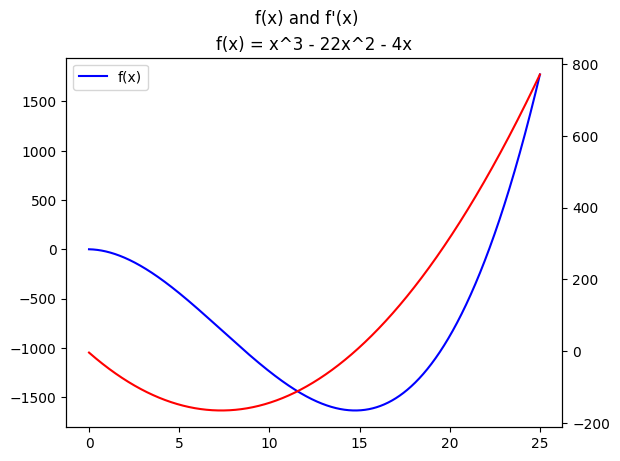

In [5]:
# Create a numerical function f(x) = x^3 - 22x^2 - 4x from 0 to 25 with a step size of 0.001
_x_vals = np.arange(0, 25, 0.001)
_f_x_vals = _x_vals ** 3 - 22 * _x_vals ** 2 - 4 * _x_vals

# Differentiate
_f_prime_vals = differentiate(_x_vals, _f_x_vals)
_f_x_fig, _f_x_ax = plt.subplots()
plt.suptitle("f(x) and f'(x)")
plt.title("f(x) = x^3 - 22x^2 - 4x")

_f_x_ax.plot(_x_vals, _f_x_vals, "b", label="f(x)")

_f_prime_ax = _f_x_ax.twinx()
_f_prime_ax.plot(_x_vals, _f_prime_vals, "r", label="f'(x)")

_f_x_ax.legend()

plt.show()


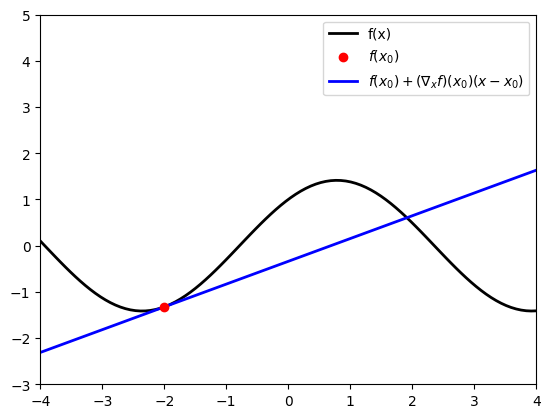

In [6]:
xs = np.linspace(-4,4,100)
point = -2
f = sym.sin(x) + sym.cos(x)
fLam = sym.lambdify('x', f)
fdLam = sym.lambdify('x', sym.diff(f))
derived = fLam(point) + (fdLam(point) * (xs - point))
f
derived

plt.plot(xs, fLam(xs), lw = 2, color = 'k', zorder = 1, label = 'f(x)')
plt.scatter(point, fLam(point), color = 'r', zorder = 2, label = r'$f(x_0)$')
plt.plot(xs, derived, lw = 2, color = 'b', zorder =1, label = r'$f(x_0) + (\nabla_xf)(x_0)(x-x_0)$')
plt.axis([-4, 4, -3, 5])
plt.legend(loc = 1);

3.2.3. Taylor’s theorem

In [11]:
def Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree):
    from sympy import factorial, Matrix, prod
    import itertools

    n_var = len(variable_list)
    point_coordinates = [(i, j) for i, j in (zip(variable_list, evaluation_point))]  # list of tuples with variables and their evaluation_point coordinates, to later perform substitution

    deriv_orders = list(itertools.product(range(degree + 1), repeat=n_var))  # list with exponentials of the partial derivatives
    deriv_orders = [deriv_orders[i] for i in range(len(deriv_orders)) if sum(deriv_orders[i]) <= degree]  # Discarding some higher-order terms
    n_terms = len(deriv_orders)
    deriv_orders_as_input = [list(sum(list(zip(variable_list, deriv_orders[i])), ())) for i in range(n_terms)]  # Individual degree of each partial derivative, of each term

    polynomial = 0
    for i in range(n_terms):
        partial_derivatives_at_point = function_expression.diff(*deriv_orders_as_input[i]).subs(point_coordinates)  # e.g. df/(dx*dy**2)
        denominator = prod([factorial(j) for j in deriv_orders[i]])  # e.g. (1! * 2!)
        distances_powered = prod([(Matrix(variable_list) - Matrix(evaluation_point))[j] ** deriv_orders[i][j] for j in range(n_var)])  # e.g. (x-x0)*(y-y0)**2
        polynomial += partial_derivatives_at_point / denominator * distances_powered
    return polynomial
    from sympy import symbols, sqrt, atan, ln
    import sympy as sp
    x = sp.symbols('x')
    y = sp.symbols('y')
    function_expression = x*sqrt(y)
    variable_list = [x,y]
    evaluation_point = [1,4]
    degree=1
    print(Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree))
    degree=2
    print(Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree))
    from mpl_toolkits import mplot3d
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt

    def f(x, y):
      return x*np.sqrt(y)

    x = np.linspace(-12, 12, 60)
    y = np.linspace(-12, 12, 30)

    X, Y = np.meshgrid(x, y)
    Z  = f(X, Y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    ax.view_init(60, 35)
    plt.show()
    fig